In [3]:
######### Download packages #########
# ! pip install requests
# ! pip install jsonlines
# ! pip install geopandas

In [1]:
from getdata import GetData

In [2]:
# API 인증키
key = "D9C2C32A-110D-3F33-846F-A831EE3AF020"
# 배경지도 (csv)
background = './data/GSBD_DG_geo.csv'
# 창고 위치 (geojson)
warehouse = './data/GSBD_DG_refrigerated_warehouse.geojson'
# 경사도 정보 (gpkg)
slope = './data/polygonized.gpkg'

In [3]:
# GetData 인스턴스 생성
data = GetData(key, background, warehouse, slope)

In [4]:
danger = data.get_lon_lat("dng")
restricted = data.get_lon_lat("res")
prohibited = data.get_lon_lat("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


In [5]:
restricted_rev = data.get_lat_lon("res")
danger_rev = data.get_lat_lon("dng")
prh_rev = data.get_lat_lon("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


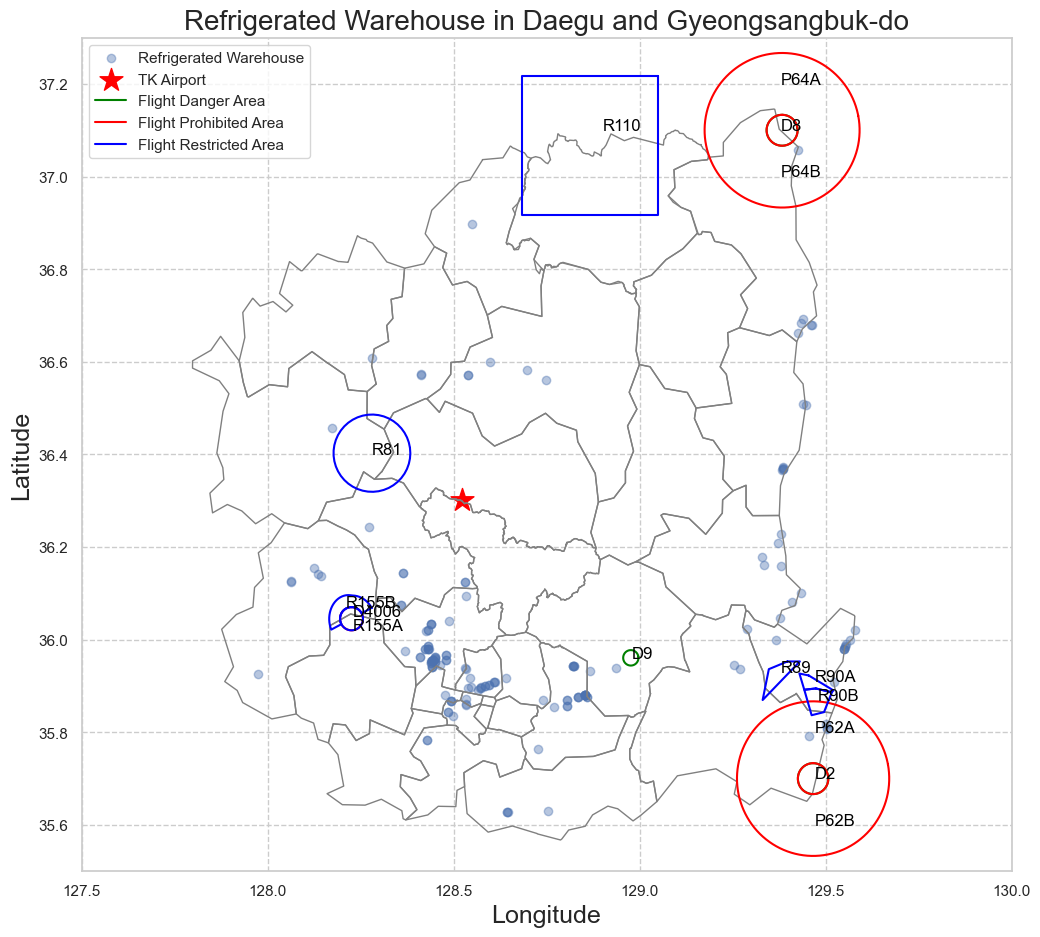

In [6]:
# save = True: 사진 저장
data.plt_visualize(danger, prohibited, restricted, slope = False, save=False)

# **K-means algorithm**

## K = 1

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/Desktop/Git/Big_Data_Design/Team_project/getdata.py:331: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x = 'lon', y = 'lat', data = warehouse, hue = 'cluster', palette=['darkorange', 'mediumseagreen', 'cornflowerblue'], marker='o', alpha=0.4)


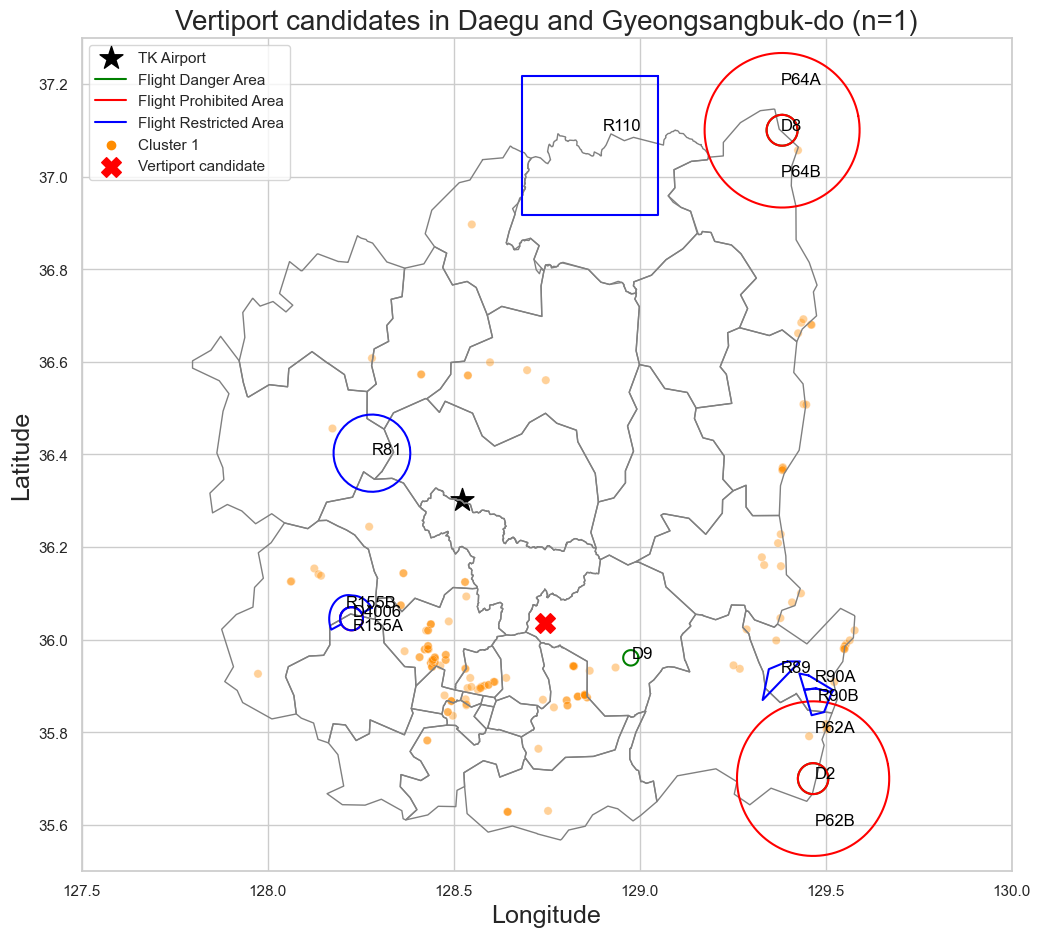

In [7]:
warehouse_df1, centroids_df1 = data.Kmeans(1, danger, prohibited, restricted, slope = False, save=False)

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/Desktop/Git/Big_Data_Design/Team_project/getdata.py:331: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.scatterplot(x = 'lon', y = 'lat', data = warehouse, hue = 'cluster', palette=['darkorange', 'mediumseagreen', 'cornflowerblue'], marker='o', alpha=0.4)


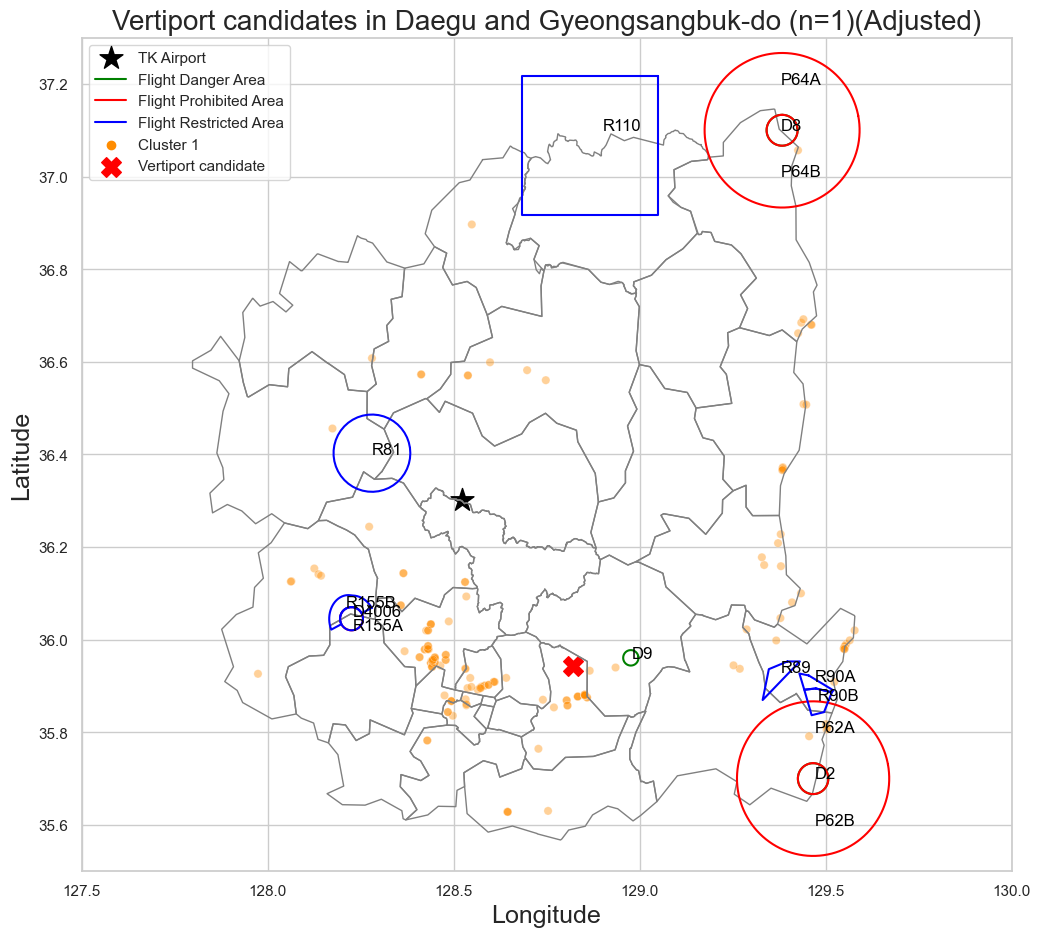

In [8]:
warehouse_df1_ad, centroids_df1_ad = data.Kmeans(1, danger, prohibited, restricted, slope = False, save=False, adjust=True)

In [ ]:
# 선 클릭하면 해당 제한구역의 이름 확인 가능
data.folium_visualize(5000, centroids_df1, prh_rev, restricted_rev, danger_rev)

## K = 2

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


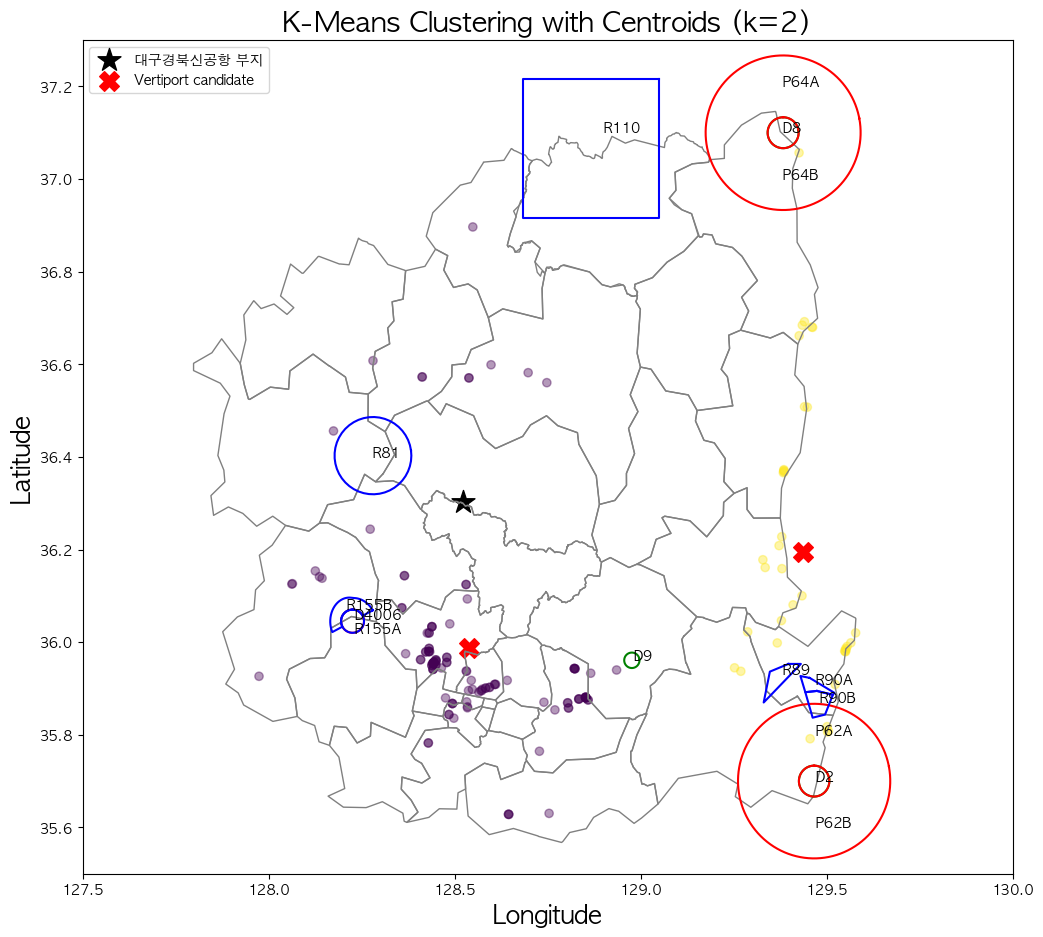

In [ ]:
warehouse_df2, centroids_df2 = data.Kmeans(2, danger, prohibited, restricted, slope = False, save=True)

In [ ]:
data.folium_visualize(5000, centroids_df2, prh_rev, restricted_rev, danger_rev)

## K = 3

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


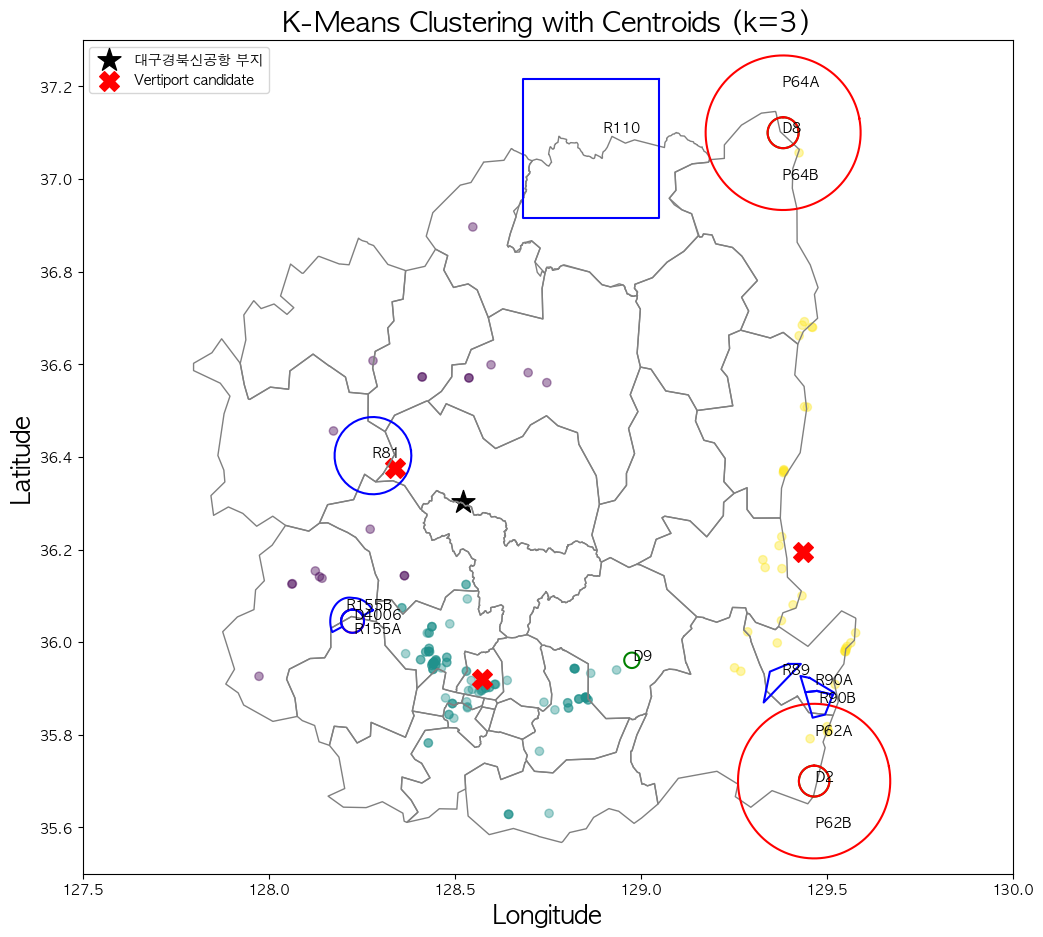

In [ ]:
warehouse_df3, centroids_df3 = data.Kmeans(3, danger, prohibited, restricted, slope = False, save=False)

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


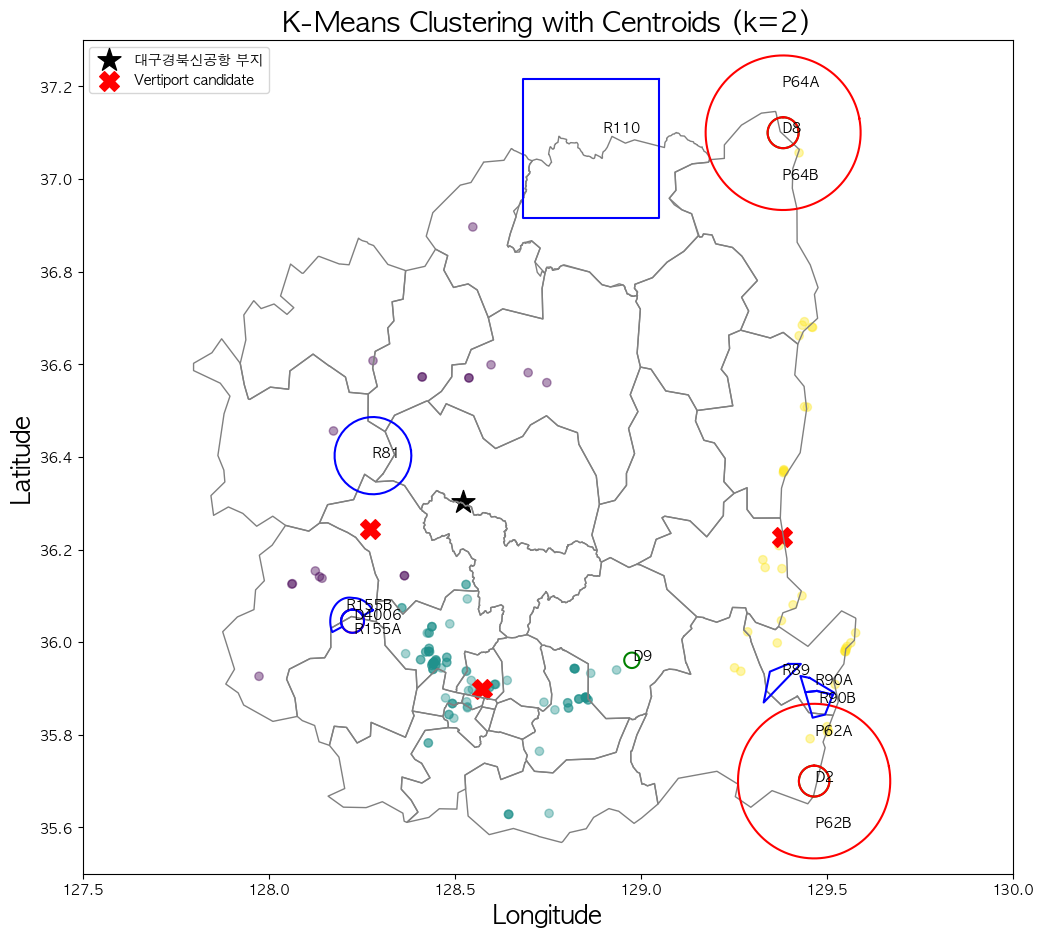

In [ ]:
warehouse_df3_ad, centroids_df3_ad = data.Kmeans(3, danger, prohibited, restricted, slope = False, save=False, adjust = True)

In [ ]:
data.folium_visualize(5000, centroids_df3, prh_rev, restricted_rev, danger_rev)

## K = 4

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


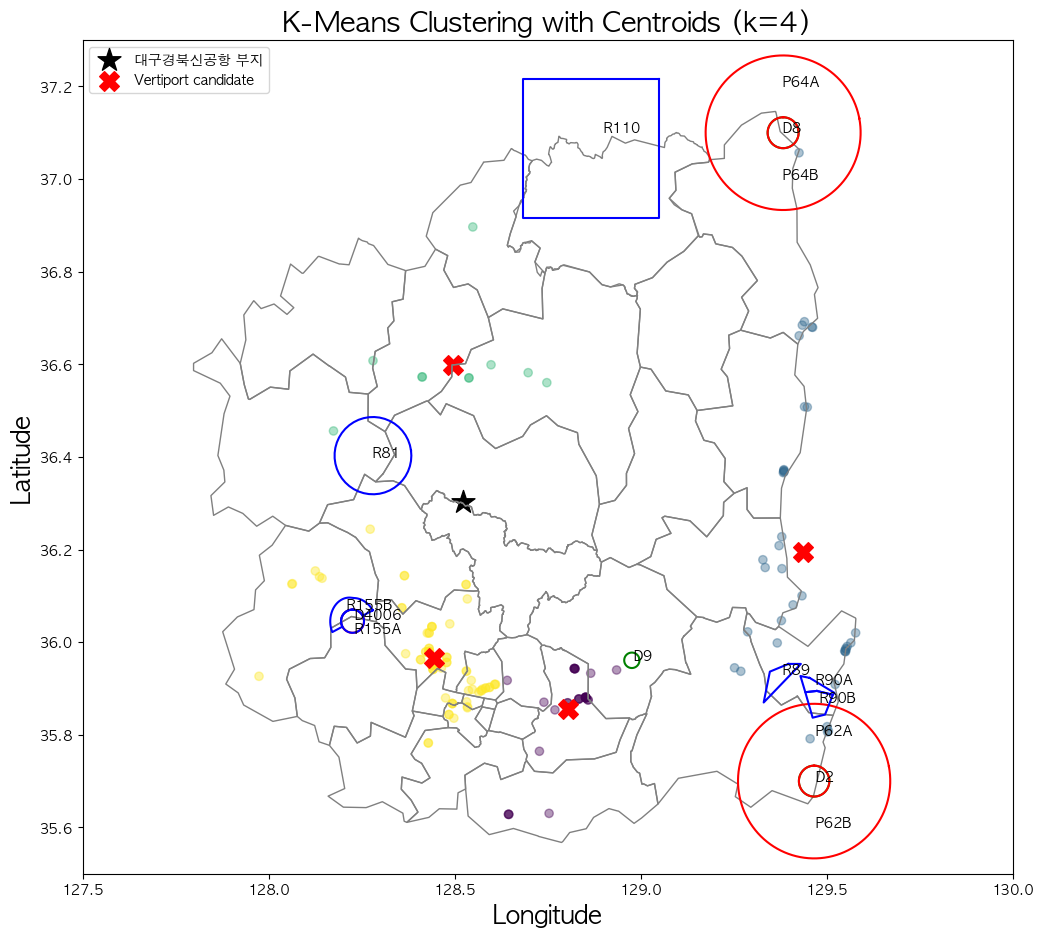

In [ ]:
warehouse_df4, centroids_df4 = data.Kmeans(4, danger, prohibited, restricted, slope = False, save=True)

In [ ]:
data.folium_visualize(5000, centroids_df4, prh_rev, restricted_rev, danger_rev)

## K = 5

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


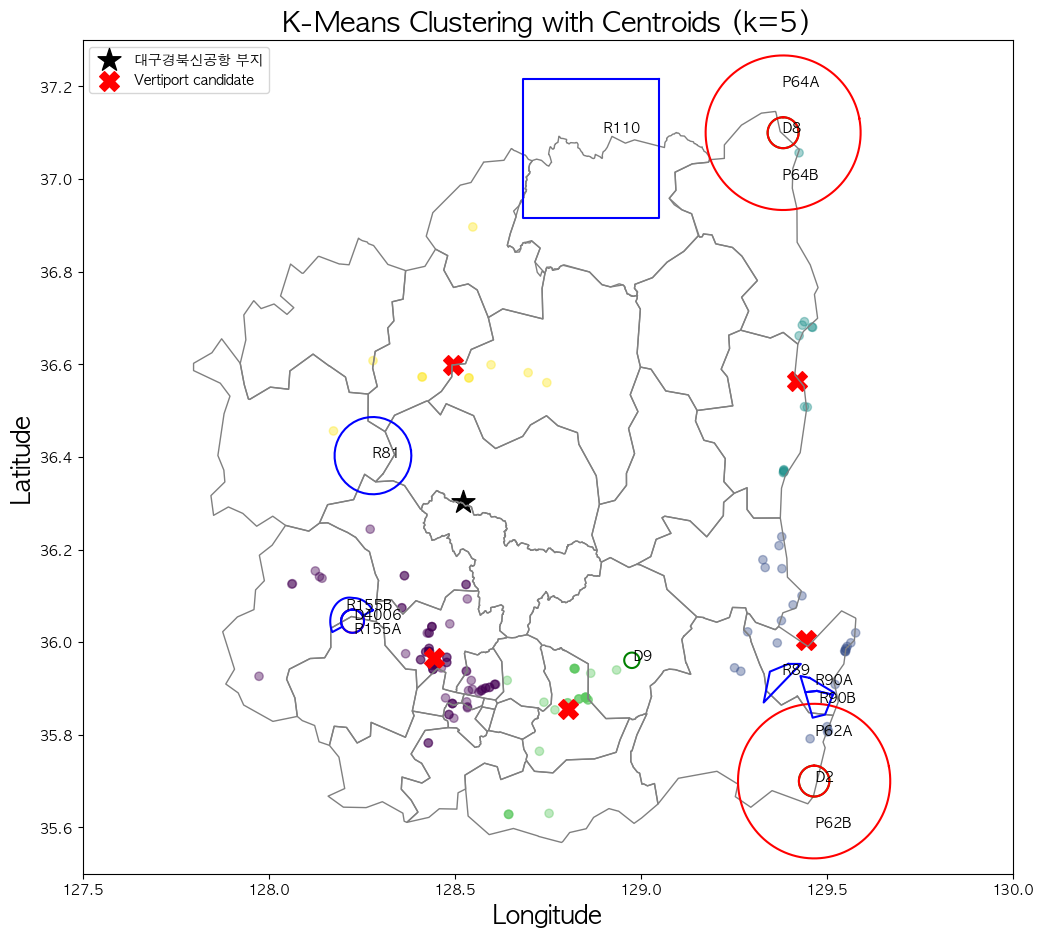

In [ ]:
warehouse_df5, centroids_df5 = data.Kmeans(5, danger, prohibited, restricted, slope = False, save=True)

In [ ]:
data.folium_visualize(5000, centroids_df5, prh_rev, restricted_rev, danger_rev)

## K = 6

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


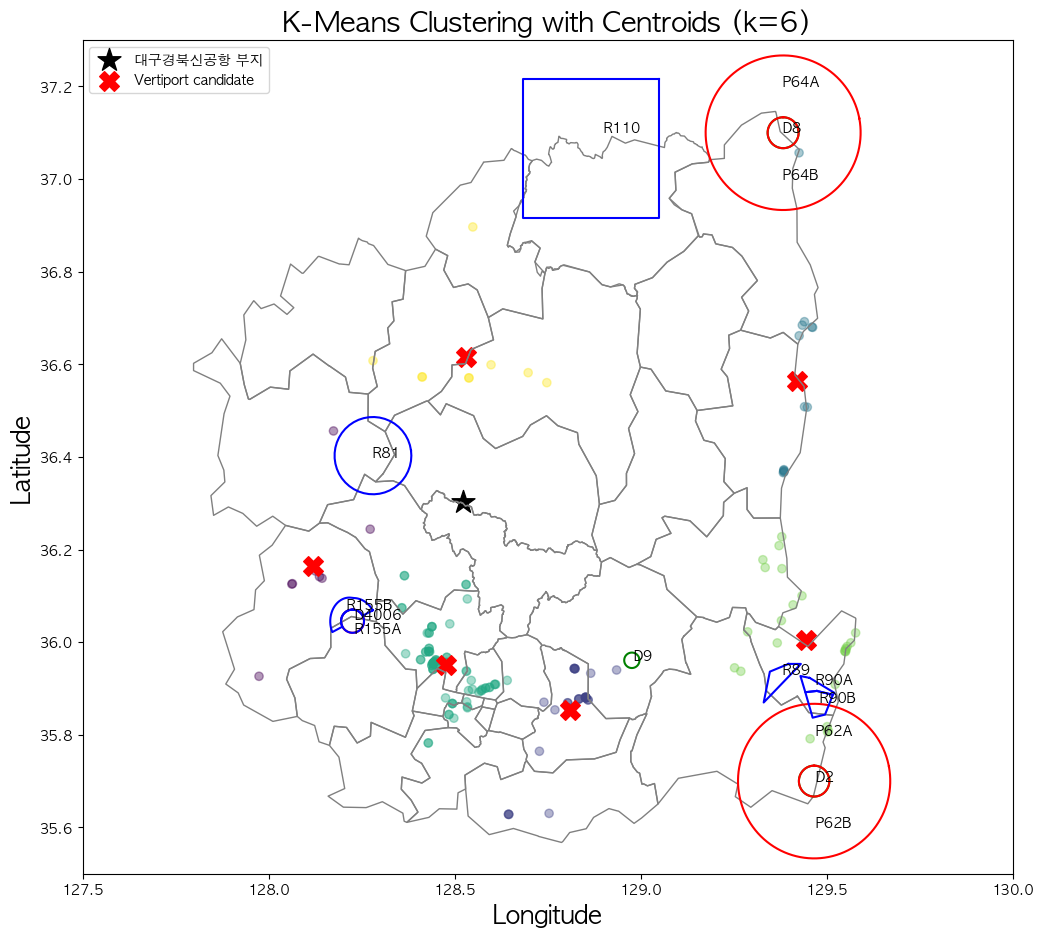

In [ ]:
warehouse_df6, centroids_df6 = data.Kmeans(6, danger, prohibited, restricted, slope = False, save=True)

In [ ]:
data.folium_visualize(5000, centroids_df6, prh_rev, restricted_rev, danger_rev)

# **Determination of the optimal K for K-Means algorithm**

## Silhouette Method

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

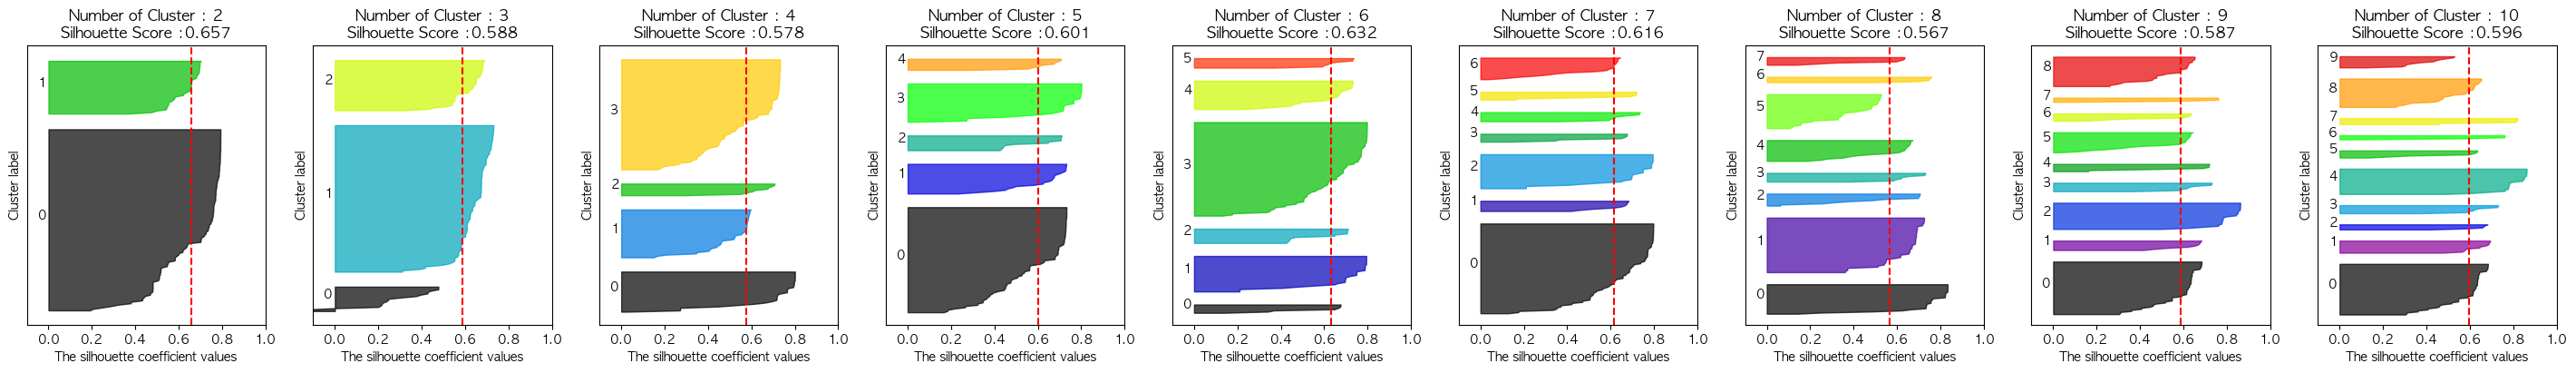

In [ ]:
sil_values, sil_avg = data.silhouette(10, save = False)

## **Elbow method**

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

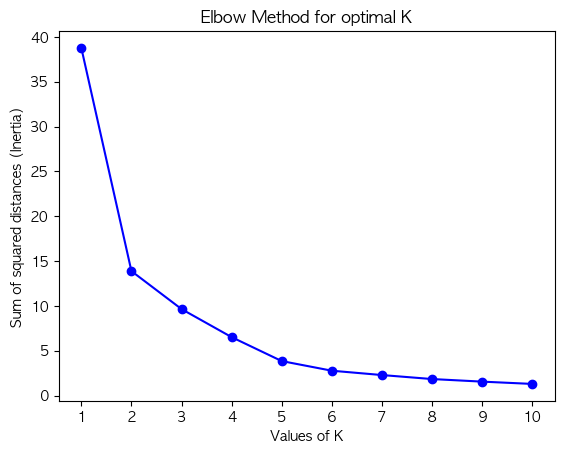

<Figure size 640x480 with 0 Axes>

In [ ]:
data.elbow(10, save= False)

In [10]:
title = ""
t = "l"
title += t
title

'l'